## DATA ENGINEER WORKFLOW

## Step 1 - Pilih Dataset publik

## DATASET E-COMMERSE

In [1]:
# Langkah- Langkah di Google Colab

#Install & Import Library

import pandas as pd
import sqlite3

In [3]:
# Download langsung dari URL

# Download langsung dari URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Lihat 5 data teratas
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## CLEANING & EKSPLORASI

In [4]:
# info dataset
df.info()

# cek nilai null
df.isnull().sum()

# contoh summary statistik
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


<bound method NDFrame.describe of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

## SIMPAN KE SQLite

In [5]:
# Buat koneksi database SQLite
conn = sqlite3.connect("ecommerce_tips.db")

# Simpan dataframe ke tabel 'tips'
df.to_sql("tips", conn, index=False, if_exists="replace")

# Contoh cek isi tabel
pd.read_sql("SELECT * FROM tips LIMIT 5", conn)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Query Data dengan SQL

In [6]:
# Contoh: Total tagihan per hari
query = """
SELECT day, SUM(total_bill) AS total_sales
FROM tips
GROUP BY day
ORDER BY total_sales DESC
"""
result = pd.read_sql(query, conn)
result


,day,total_sales
0,Sat,1778.40
1,Sun,1627.16
2,Thur,1096.33
3,Fri,325.88


## Visualisasi Hasil

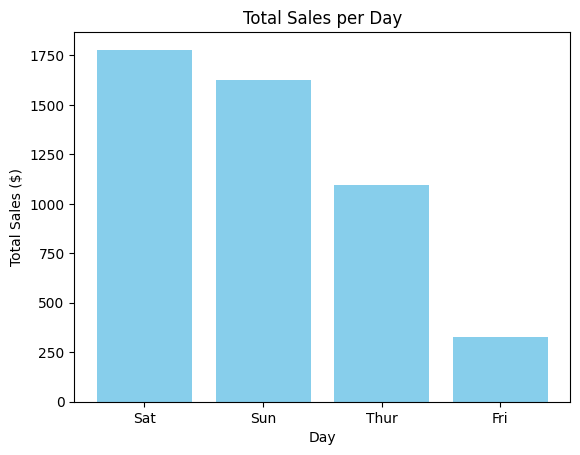

In [7]:
import matplotlib.pyplot as plt

plt.bar(result["day"], result["total_sales"], color="skyblue")
plt.title("Total Sales per Day")
plt.xlabel("Day")
plt.ylabel("Total Sales ($)")
plt.show()


## Export Hasil ke Excel

In [8]:
result.to_excel("total_sales_per_day.xlsx", index=False)

# Download file
from google.colab import files
files.download("total_sales_per_day.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## DATASET COVID 19

In [9]:
import pandas as pd
import sqlite3


In [12]:
# Download langsung dari URL

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Lihat 5 data teratas
df.head()

df = pd.read_csv(url)

# Lihat 5 data teratas
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [13]:
# Info dataset
df.info()

# Cek nilai null
df.isnull().sum()

# Contoh summary statistik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


In [14]:
# Buat koneksi database SQLite
conn = sqlite3.connect("ecommerce_tips.db")

# Simpan dataframe ke tabel 'tips'
df.to_sql("tips", conn, index=False, if_exists="replace")

# Contoh cek isi tabel
pd.read_sql("SELECT * FROM tips LIMIT 5", conn)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,None,0.0,0.0,None,...,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,None,0.0,0.0,None,...,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,None,0.0,0.0,None,...,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,None,0.0,0.0,None,...,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,None,0.0,0.0,None,...,None,37.746,0.5,64.83,0.511,41128772,None,None,None,None


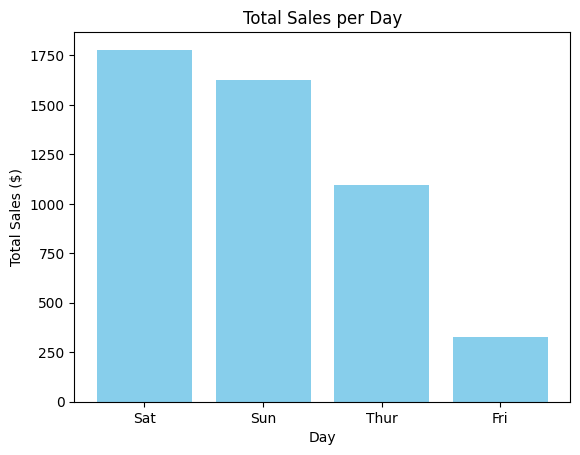

In [15]:
import matplotlib.pyplot as plt

plt.bar(result["day"], result["total_sales"], color="skyblue")
plt.title("Total Sales per Day")
plt.xlabel("Day")
plt.ylabel("Total Sales ($)")
plt.show()


In [16]:
result.to_excel("total_sales_per_day.xlsx", index=False)

# Download file
from google.colab import files
files.download("total_sales_per_day.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## DATASET LEBIH BESAR: COVID-19 GLOBAL DATA

In [17]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# Baca data langsung dari URL
df = pd.read_csv(url)

# Tampilkan 5 baris pertama
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [18]:
# Cek kolom
df.columns

# Info dataset
df.info()

# Cek nilai kosong
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [19]:
df_id = df[df['location'] == 'Indonesia'].copy()

# Lihat data
df_id.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
175231,IDN,Asia,Indonesia,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344,NaN,NaN,NaN,NaN
175232,IDN,Asia,Indonesia,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344,NaN,NaN,NaN,NaN
175233,IDN,Asia,Indonesia,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344,NaN,NaN,NaN,NaN
175234,IDN,Asia,Indonesia,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344,NaN,NaN,NaN,NaN
175235,IDN,Asia,Indonesia,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,76.1,64.204,1.04,71.72,0.718,275501344,NaN,NaN,NaN,NaN


In [20]:
import sqlite3

conn = sqlite3.connect("covid19.db")

# Simpan tabel
df_id.to_sql("covid_indonesia", conn, index=False, if_exists="replace")

# Cek tabel
pd.read_sql("SELECT * FROM covid_indonesia LIMIT 5", conn)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IDN,Asia,Indonesia,2020-01-05,0.0,0.0,None,0.0,0.0,None,...,76.1,64.204,1.04,71.72,0.718,275501344,None,None,None,None
1,IDN,Asia,Indonesia,2020-01-06,0.0,0.0,None,0.0,0.0,None,...,76.1,64.204,1.04,71.72,0.718,275501344,None,None,None,None
2,IDN,Asia,Indonesia,2020-01-07,0.0,0.0,None,0.0,0.0,None,...,76.1,64.204,1.04,71.72,0.718,275501344,None,None,None,None
3,IDN,Asia,Indonesia,2020-01-08,0.0,0.0,None,0.0,0.0,None,...,76.1,64.204,1.04,71.72,0.718,275501344,None,None,None,None
4,IDN,Asia,Indonesia,2020-01-09,0.0,0.0,None,0.0,0.0,None,...,76.1,64.204,1.04,71.72,0.718,275501344,None,None,None,None


In [21]:
query = """
SELECT
  substr(date, 1, 7) AS bulan,
  SUM(new_cases) AS total_kasus
FROM covid_indonesia
GROUP BY bulan
ORDER BY bulan
"""

result = pd.read_sql(query, conn)
result


,bulan,total_kasus
0,2020-01,0.0
1,2020-02,0.0
2,2020-03,1285.0
3,2020-04,7597.0
4,2020-05,17591.0
5,2020-06,27537.0
6,2020-07,44768.0
7,2020-08,73275.0
8,2020-09,103160.0
9,2020-10,114499.0


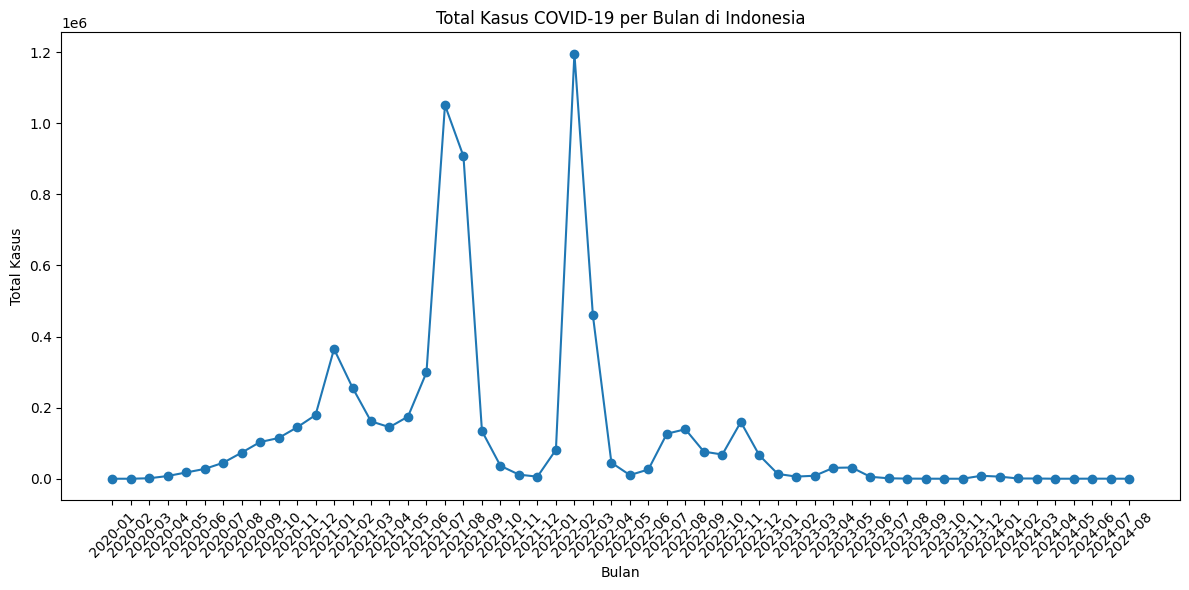

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(result["bulan"], result["total_kasus"], marker="o")
plt.title("Total Kasus COVID-19 per Bulan di Indonesia")
plt.xlabel("Bulan")
plt.ylabel("Total Kasus")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
result.to_excel("total_kasus_per_bulan.xlsx", index=False)

from google.colab import files
files.download("total_kasus_per_bulan.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Advanced SQL Topics yang Akan Kita Praktekkan
Berikut langkah-langkahnya (step by step):

1️⃣ CASE WHEN – kategorisasi data
2️⃣ CTE (WITH) – query modular & lebih bersih
3️⃣ WINDOW FUNCTIONS – ROW_NUMBER(), LAG(), LEAD()
4️⃣ DATE FUNCTIONS – manipulasi tanggal

Kita pakai tabel covid_indonesia yang sudah kita buat di SQLite.

🟢 1️⃣ CASE WHEN
Tujuan: Membuat kategori jumlah kasus harian

🎯 Contoh:
Jika new_cases:

5000 → "tinggi"

1000–5000 → "sedang"

< 1000 → "rendah"



In [24]:
query_case = """
SELECT
  date,
  new_cases,
  CASE
    WHEN new_cases > 5000 THEN 'tinggi'
    WHEN new_cases BETWEEN 1000 AND 5000 THEN 'sedang'
    ELSE 'rendah'
  END AS kategori_kasus
FROM covid_indonesia
ORDER BY date
LIMIT 20
"""

pd.read_sql(query_case, conn)


,date,new_cases,kategori_kasus
0,2020-01-05,0.0,rendah
1,2020-01-06,0.0,rendah
2,2020-01-07,0.0,rendah
3,2020-01-08,0.0,rendah
4,2020-01-09,0.0,rendah
5,2020-01-10,0.0,rendah
6,2020-01-11,0.0,rendah
7,2020-01-12,0.0,rendah
8,2020-01-13,0.0,rendah
9,2020-01-14,0.0,rendah


##  CTE (Common Table Expressions)
Tujuan: Buat query modular yang bisa dipanggil berkali-kali

🎯 Contoh:
Ambil total kasus per bulan + rata-rata kasus per hari

In [25]:
query_cte = """
WITH monthly_cases AS (
  SELECT
    substr(date,1,7) AS bulan,
    SUM(new_cases) AS total_kasus,
    AVG(new_cases) AS rata_rata_kasus
  FROM covid_indonesia
  GROUP BY bulan
)
SELECT *
FROM monthly_cases
ORDER BY bulan
"""

pd.read_sql(query_cte, conn)


,bulan,total_kasus,rata_rata_kasus
0,2020-01,0.0,0.000000
1,2020-02,0.0,0.000000
2,2020-03,1285.0,41.451613
3,2020-04,7597.0,253.233333
4,2020-05,17591.0,567.451613
5,2020-06,27537.0,917.900000
6,2020-07,44768.0,1444.129032
7,2020-08,73275.0,2363.709677
8,2020-09,103160.0,3438.666667
9,2020-10,114499.0,3693.516129


## WINDOW FUNCTION
Tujuan: Analisis data berdasarkan urutan baris

In [26]:
query_rownum = """
SELECT
  date,
  new_cases,
  ROW_NUMBER() OVER (ORDER BY date) AS urutan_hari
FROM covid_indonesia
LIMIT 10
"""

pd.read_sql(query_rownum, conn)


,date,new_cases,urutan_hari
0,2020-01-05,0.0,1
1,2020-01-06,0.0,2
2,2020-01-07,0.0,3
3,2020-01-08,0.0,4
4,2020-01-09,0.0,5
5,2020-01-10,0.0,6
6,2020-01-11,0.0,7
7,2020-01-12,0.0,8
8,2020-01-13,0.0,9
9,2020-01-14,0.0,10


## Hitung selisih kasus dengan hari sebelumnya (LAG())

In [27]:
query_lag = """
SELECT
  date,
  new_cases,
  LAG(new_cases) OVER (ORDER BY date) AS kasus_hari_sebelumnya,
  new_cases - LAG(new_cases) OVER (ORDER BY date) AS selisih
FROM covid_indonesia
ORDER BY date
LIMIT 15
"""

pd.read_sql(query_lag, conn)


,date,new_cases,kasus_hari_sebelumnya,selisih
0,2020-01-05,0.0,NaN,NaN
1,2020-01-06,0.0,0.0,0.0
2,2020-01-07,0.0,0.0,0.0
3,2020-01-08,0.0,0.0,0.0
4,2020-01-09,0.0,0.0,0.0
5,2020-01-10,0.0,0.0,0.0
6,2020-01-11,0.0,0.0,0.0
7,2020-01-12,0.0,0.0,0.0
8,2020-01-13,0.0,0.0,0.0
9,2020-01-14,0.0,0.0,0.0


DATE FUNCTIONS
Tujuan: Manipulasi tanggal dengan lebih fleksibel

🎯 Contoh: Ekstrak Tahun & Bulan

In [28]:
query_date = """
SELECT
  date,
  strftime('%Y', date) AS tahun,
  strftime('%m', date) AS bulan,
  new_cases
FROM covid_indonesia
LIMIT 10
"""

pd.read_sql(query_date, conn)


,date,tahun,bulan,new_cases
0,2020-01-05,2020,01,0.0
1,2020-01-06,2020,01,0.0
2,2020-01-07,2020,01,0.0
3,2020-01-08,2020,01,0.0
4,2020-01-09,2020,01,0.0
5,2020-01-10,2020,01,0.0
6,2020-01-11,2020,01,0.0
7,2020-01-12,2020,01,0.0
8,2020-01-13,2020,01,0.0
9,2020-01-14,2020,01,0.0


Apa Itu Pipeline Automatisasi?
Pipeline automatisasi = proses yang berjalan otomatis untuk:

Extract data (misalnya download dari internet)

Transform data (cleaning, agregasi)

Load data (simpan ke database)

Report/Visualisasi hasil

Di perusahaan, pipeline bisa dijadwalkan daily / hourly agar data selalu up-to-date.

🛠️ Alur Pipeline yang Kita Buat Sekarang
Kita akan bikin pipeline end-to-end di Google Colab:
✅ Download data COVID-19 terbaru
✅ Bersihkan dan transform
✅ Simpan ke SQLite
✅ Buat summary tabel
✅ Export hasil ke Excel/CSV
✅ Visualisasi tren
✅ Semua langkah otomatis dalam satu script

Nanti script ini bisa kamu:

Dijadwalkan dengan cron/airflow (di server)

Dibungkus jadi modul Python

📄 Pipeline Automatisasi – Script Lengkap

## 1️⃣ Install & Import Library

In [29]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime


## 2️⃣ Extract – Download Dataset Terbaru

In [30]:
# Dataset COVID-19 Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
print("Data berhasil diunduh.")


Data berhasil diunduh.


## 3️⃣ Transform – Filter & Bersihkan

In [31]:
# Filter Indonesia
df_id = df[df["location"] == "Indonesia"].copy()

# Drop kolom yang jarang dipakai (opsional)
df_id = df_id[["date", "new_cases", "total_cases", "new_deaths", "total_deaths"]]

# Konversi tanggal
df_id["date"] = pd.to_datetime(df_id["date"])

# Cek data
df_id.head()


,date,new_cases,total_cases,new_deaths,total_deaths
175231,2020-01-05,0.0,0.0,0.0,0.0
175232,2020-01-06,0.0,0.0,0.0,0.0
175233,2020-01-07,0.0,0.0,0.0,0.0
175234,2020-01-08,0.0,0.0,0.0,0.0
175235,2020-01-09,0.0,0.0,0.0,0.0


## 4️⃣ Load – Simpan ke SQLite

In [32]:
# Buat / konek database
conn = sqlite3.connect("covid_pipeline.db")

# Simpan tabel
df_id.to_sql("covid_indonesia", conn, if_exists="replace", index=False)

print("Data berhasil disimpan ke SQLite.")


Data berhasil disimpan ke SQLite.


## 5️⃣ Summary – Total Kasus per Bulan

In [33]:
query_summary = """
SELECT
  strftime('%Y-%m', date) AS bulan,
  SUM(new_cases) AS total_new_cases,
  SUM(new_deaths) AS total_new_deaths
FROM covid_indonesia
GROUP BY bulan
ORDER BY bulan
"""

df_summary = pd.read_sql(query_summary, conn)
df_summary


,bulan,total_new_cases,total_new_deaths
0,2020-01,0.0,0.0
1,2020-02,0.0,0.0
2,2020-03,1285.0,114.0
3,2020-04,7597.0,629.0
4,2020-05,17591.0,870.0
5,2020-06,27537.0,1141.0
6,2020-07,44768.0,2027.0
7,2020-08,73275.0,2562.0
8,2020-09,103160.0,3043.0
9,2020-10,114499.0,2913.0


## 6️⃣ Export – Simpan ke Excel

In [34]:
# Export ke Excel
df_summary.to_excel("summary_covid_indonesia.xlsx", index=False)
print("File Excel berhasil dibuat.")

# Download file
from google.colab import files
files.download("summary_covid_indonesia.xlsx")


File Excel berhasil dibuat.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7️⃣ Visualisasi – Tren Kasus

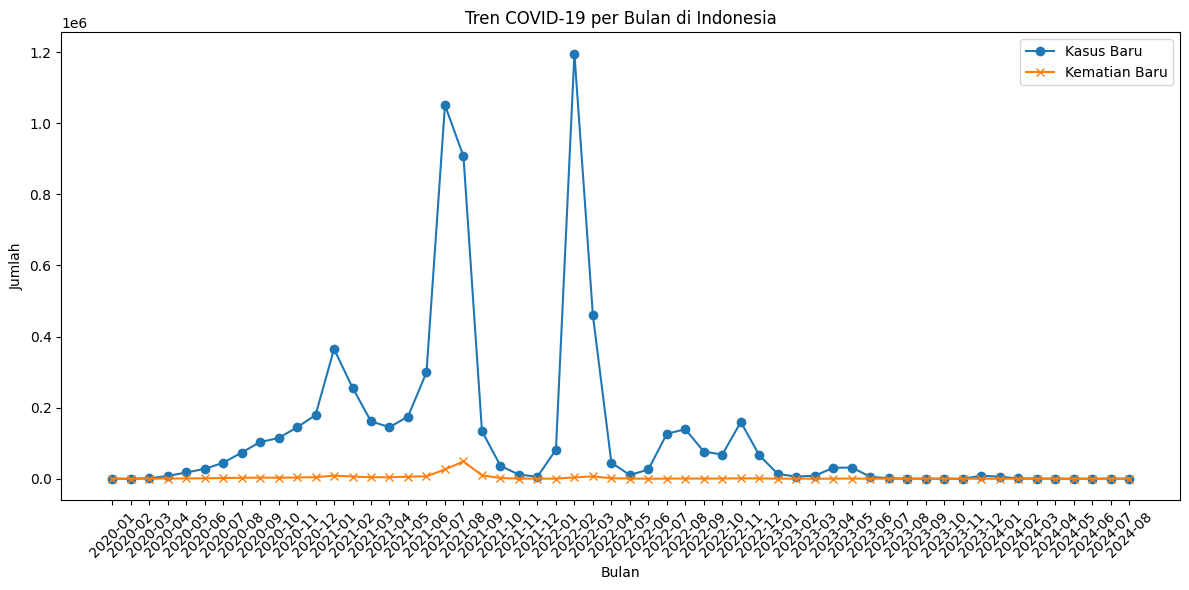

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df_summary["bulan"], df_summary["total_new_cases"], marker="o", label="Kasus Baru")
plt.plot(df_summary["bulan"], df_summary["total_new_deaths"], marker="x", label="Kematian Baru")
plt.title("Tren COVID-19 per Bulan di Indonesia")
plt.xlabel("Bulan")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
